# Zadanie 2

In [ ]:
library(ggplot2)
library(glue)
library(dplyr)
library(readr)
library(ggthemes)

In [2]:
inflation_data <- read.csv("data/EU_Inflation_HICP_data_mod.csv", header = TRUE, sep = ",")
deposits_data <- read.csv("data/EU_deposits_1yr_data_mod.csv", header = TRUE, sep = ",")

In [ ]:
head(inflation_data)

In [88]:
head(deposits_data)

,Period,Austria..Euro,Belgium..Euro,Bulgaria..Bulgarian.lev,Cyprus..Euro,Czech.Republic..Czech.koruna,Germany..Euro,Denmark..Danish.krone,Estonia..Estonian.kroon,Estonia..Euro,⋯,Malta..Maltese.lira,Netherlands..Euro,Poland..Polish.zloty,Portugal..Euro,Romania..Romanian.leu,Sweden..Swedish.krona,Slovenia..Euro,Slovenia..Slovenian.tolar,Slovakia..Euro,Slovakia..Slovak.koruna
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-09-01,0.80,0.84,0.12,0.11,6.10,0.84,1.15,NA,0.94,⋯,NA,1.84,5.44,0.05,6.44,1.65,0.11,NA,0.77,NA
2,2022-08-01,0.37,0.37,0.11,0.06,5.98,0.49,0.25,NA,0.83,⋯,NA,1.53,5.22,0.07,6.22,1.21,0.04,NA,0.48,NA
3,2022-07-01,0.23,0.11,0.09,0.05,5.95,0.31,-0.44,NA,0.59,⋯,NA,1.59,4.85,0.09,5.49,0.90,0.03,NA,0.21,NA
4,2022-06-01,0.12,0.14,0.06,0.05,5.37,0.17,-0.45,NA,0.49,⋯,NA,1.47,4.50,0.07,4.37,0.53,0.03,NA,0.16,NA
5,2022-05-01,0.08,0.07,0.04,0.05,4.53,0.14,-0.50,NA,0.50,⋯,NA,1.23,3.38,0.04,3.21,0.38,0.04,NA,0.21,NA
6,2022-04-01,0.10,0.06,0.04,0.05,4.17,0.14,-0.51,NA,0.44,⋯,NA,1.15,2.03,0.04,2.56,0.32,0.03,NA,0.24,NA


In [3]:
inflation_data$Period <- as.Date(inflation_data$Period, format = "%d/%m/%Y")
deposits_data$Period <- as.Date(deposits_data$Period, format = "%d/%m/%Y")

In [265]:
deposits_data[, 2:34] <- sapply(deposits_data[, 2:34], as.numeric)
# str(deposits_data)

In [5]:
eurozone_countries_inflation <- select(inflation_data, matches("Period|Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia"))
other_countries_inflation <- select(inflation_data, !matches("EU|Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia"))
# EU_countries_inflation <- select(inflation_data, matches("Period|EU"))
# Poland_inflation <- select(inflation_data, matches("Period|Poland"))

In [6]:
head(eurozone_countries_inflation)

,Period,Austria,Belgium,Cyprus,Germany,Estonia,Spain,Finland,France,Greece,Ireland,Italy,Lithuania,Luxembourg,Latvia,Malta,Netherlands,Portugal,Slovenia,Slovakia
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-10-01,11.5,13.1,8.6,11.6,22.4,7.3,8.3,7.1,9.8,9.6,12.8,22.0,8.8,21.8,7.5,16.8,10.6,10.3,14.5
2,2022-09-01,10.9,12.1,9.0,10.9,24.1,9.0,8.4,6.2,12.1,8.6,9.4,22.5,8.8,22.0,7.4,17.1,9.8,10.6,13.6
3,2022-08-01,9.3,10.5,9.6,8.8,25.2,10.5,7.9,6.6,11.2,9.0,9.1,21.1,8.6,21.4,7.0,13.7,9.3,11.5,13.4
4,2022-07-01,9.4,10.4,10.6,8.5,23.2,10.7,8.0,6.8,11.3,9.6,8.4,20.9,9.3,21.3,6.8,11.6,9.4,11.7,12.8
5,2022-06-01,8.7,10.5,9.0,8.2,22.0,10.0,8.1,6.5,11.6,9.6,8.5,20.5,10.3,19.2,6.1,9.9,9.0,10.8,12.6
6,2022-05-01,7.7,9.9,8.8,8.7,20.1,8.5,7.1,5.8,10.5,8.3,7.3,18.5,9.1,16.8,5.8,10.2,8.1,8.7,11.8


In [7]:
eurozone_countries_inflation_avg <- data.frame(eurozone_countries_inflation[1], (rowMeans(eurozone_countries_inflation[2:20], na.rm=TRUE)))
other_countries_inflation_avg <- data.frame(other_countries_inflation[1], (rowMeans(other_countries_inflation[2:9], na.rm=TRUE)))
EU_countries_inflation <- data.frame(eurozone_countries_inflation[1], select(inflation_data, matches("EU")))
Poland_inflation <- data.frame(eurozone_countries_inflation[1], select(inflation_data, matches("Poland")))

In [8]:
inflation_avg <- data.frame(eurozone_countries_inflation[1], eurozone_countries_inflation_avg[2], other_countries_inflation_avg[2], EU_countries_inflation[2], Poland_inflation[2])

colnames(inflation_avg)[1] <- "Period"
colnames(inflation_avg)[2] <- "Eurozone"
colnames(inflation_avg)[3] <- "Other"
colnames(inflation_avg)[4] <- "EU"
colnames(inflation_avg)[5] <- "Poland"

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"Removed 96 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 97 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 49 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 109 rows containing missing values (`geom_line()`)."


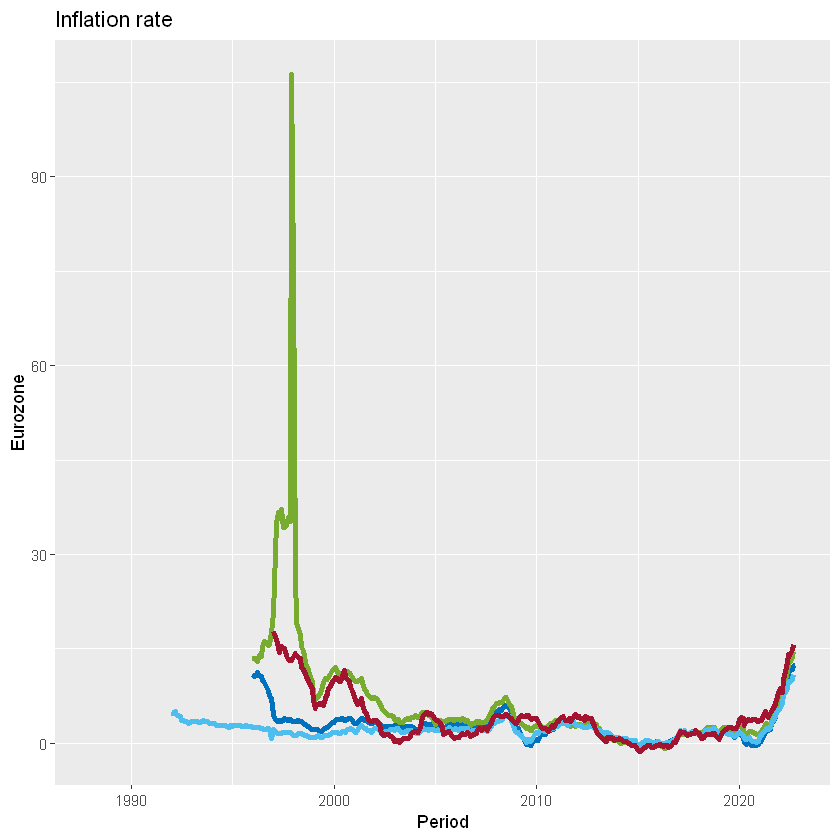

In [9]:
ggplot(data = inflation_avg, aes(x=Period)) +
  geom_line( aes(y=Eurozone), color="#0072BD", size=1.5)+
  geom_line( aes(y=Other), color="#77AC30", size=1.5)+
  geom_line( aes(y=EU), color="#4DBEEE", size=1.5)+
  geom_line( aes(y=Poland), color="#A2142F", size=1.5)+
  labs(title = "Inflation rate")

In [394]:
# January 2018 - October 2022
n_months = 58

In [396]:
copy_inf = subset(inflation_data, select=c(Period))[c(2:n_months),]

In [397]:
inflation_from2018 = subset(inflation_data, select=-c(EU..changing.composition.))[c(2:n_months),]

In [398]:
head(deposits_from2018)

,Period,Austria..Euro,Belgium..Euro,Bulgaria..Bulgarian.lev,Cyprus..Euro,Czech.Republic..Czech.koruna,Germany..Euro,Denmark..Danish.krone,Estonia..Euro,Spain..Euro,⋯,Luxembourg..Euro,Latvia..Euro,Malta..Euro,Netherlands..Euro,Poland..Polish.zloty,Portugal..Euro,Romania..Romanian.leu,Sweden..Swedish.krona,Slovenia..Euro,Slovakia..Euro
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-09-01,0.80,0.84,0.12,0.11,6.10,0.84,1.15,0.94,0.16,⋯,0.73,0.62,0.59,1.84,5.44,0.05,6.44,1.65,0.11,0.77
2,2022-08-01,0.37,0.37,0.11,0.06,5.98,0.49,0.25,0.83,0.01,⋯,0.72,0.41,0.54,1.53,5.22,0.07,6.22,1.21,0.04,0.48
3,2022-07-01,0.23,0.11,0.09,0.05,5.95,0.31,-0.44,0.59,0.03,⋯,0.15,0.12,0.48,1.59,4.85,0.09,5.49,0.90,0.03,0.21
4,2022-06-01,0.12,0.14,0.06,0.05,5.37,0.17,-0.45,0.49,0.01,⋯,0.11,0.16,0.39,1.47,4.50,0.07,4.37,0.53,0.03,0.16
5,2022-05-01,0.08,0.07,0.04,0.05,4.53,0.14,-0.50,0.50,0.01,⋯,0.10,0.16,0.38,1.23,3.38,0.04,3.21,0.38,0.04,0.21
6,2022-04-01,0.10,0.06,0.04,0.05,4.17,0.14,-0.51,0.44,0.01,⋯,0.04,0.14,0.40,1.15,2.03,0.04,2.56,0.32,0.03,0.24


In [399]:
deposits_from2018 = subset(deposits_data, select=-c(Slovakia..Slovak.koruna, Slovenia..Slovenian.tolar, Malta..Maltese.lira, Estonia..Estonian.kroon, Latvia..Latvian.lats, Lithuania..Lithuanian.litas))[c(1:(n_months-1)),]

In [400]:
inf_cols = colnames(subset(inflation_data, select=-c(Period, EU..changing.composition.)))

In [401]:
dep_cols = colnames(subset(deposits_data[2:34], select=-c(Slovakia..Slovak.koruna, Slovenia..Slovenian.tolar, Malta..Maltese.lira, Estonia..Estonian.kroon, Latvia..Latvian.lats, Lithuania..Lithuanian.litas)))

In [402]:
inf_cols

[1] "Austria"        "Belgium"        "Bulgaria"       "Cyprus"        
 [5] "Czech.Republic" "Germany"        "Denmark"        "Estonia"       
 [9] "Spain"          "Finland"        "France"         "Greece"        
[13] "Croatia"        "Hungary"        "Ireland"        "Italy"         
[17] "Lithuania"      "Luxembourg"     "Latvia"         "Malta"         
[21] "Netherlands"    "Poland"         "Portugal"       "Romania"       
[25] "Sweden"         "Slovenia"       "Slovakia"

In [403]:
dep_cols

[1] "Austria..Euro"                "Belgium..Euro"               
 [3] "Bulgaria..Bulgarian.lev"      "Cyprus..Euro"                
 [5] "Czech.Republic..Czech.koruna" "Germany..Euro"               
 [7] "Denmark..Danish.krone"        "Estonia..Euro"               
 [9] "Spain..Euro"                  "Finland..Euro"               
[11] "France..Euro"                 "Greece..Euro"                
[13] "Croatia..Croatian.kuna"       "Hungary..Hungarian.forint"   
[15] "Ireland..Euro"                "Italy..Euro"                 
[17] "Lithuania..Euro"              "Luxembourg..Euro"            
[19] "Latvia..Euro"                 "Malta..Euro"                 
[21] "Netherlands..Euro"            "Poland..Polish.zloty"        
[23] "Portugal..Euro"               "Romania..Romanian.leu"       
[25] "Sweden..Swedish.krona"        "Slovenia..Euro"              
[27] "Slovakia..Euro"

In [419]:
deposits_to_inflation <- data.frame(copy_inf)
for (i in 1:length(dep_cols)){
    col_inf <- inf_cols[i]
    col_dep <- dep_cols[i]
    new_column = deposits_from2018[col_dep] / inflation_from2018[col_inf]
    deposits_to_inflation[col_inf] = new_column
}
names(deposits_to_inflation)[names(deposits_to_inflation) == "copy_inf"] <- "Period"
# deposits_to_inflation[Period] = periods_from2018
deposits_to_inflation['average'] = rowMeans(deposits_from2018[2:28], na.rm=TRUE)

In [420]:
deposits_to_inflation

Period,Austria,Belgium,Bulgaria,Cyprus,Czech.Republic,Germany,Denmark,Estonia,Spain,⋯,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,average
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-09-01,0.07339450,0.069421488,0.007692308,0.012222222,0.34269663,0.077064220,0.10360360,0.03900415,0.017777778,⋯,0.028181818,0.07972973,0.10760234,0.34649682,0.005102041,0.4805970,0.16019417,0.010377358,0.05661765,1.2850000
2022-08-01,0.03978495,0.035238095,0.007333333,0.006250000,0.34970760,0.055681818,0.02525253,0.03293651,0.000952381,⋯,0.019158879,0.07714286,0.11167883,0.35270270,0.007526882,0.4676692,0.12736842,0.003478261,0.03582090,1.3492593
2022-07-01,0.02446809,0.010576923,0.006040268,0.004716981,0.34393064,0.036470588,-0.04583333,0.02543103,0.002803738,⋯,0.005633803,0.07058824,0.13706897,0.34154930,0.009574468,0.4223077,0.10843373,0.002564103,0.01640625,1.1159259
2022-06-01,0.01379310,0.013333333,0.004054054,0.005555556,0.32349398,0.020731707,-0.04945055,0.02227273,0.001000000,⋯,0.008333333,0.06393443,0.14848485,0.31690141,0.007777778,0.3361538,0.05955056,0.002777778,0.01269841,0.8903704
2022-05-01,0.01038961,0.007070707,0.002985075,0.005681818,0.29802632,0.016091954,-0.06097561,0.02487562,0.001176471,⋯,0.009523810,0.06551724,0.12058824,0.26406250,0.004938272,0.2588710,0.05066667,0.004597701,0.01779661,0.7237037
2022-04-01,0.01408451,0.006451613,0.003305785,0.005813953,0.31590909,0.017948718,-0.06891892,0.02303665,0.001204819,⋯,0.010687023,0.07407407,0.10267857,0.17807018,0.005405405,0.2188034,0.04848485,0.004054054,0.02201835,0.6200000
2022-03-01,0.01212121,0.007526882,0.003809524,0.008064516,0.29495798,0.015789474,-0.09000000,0.03175676,0.001020408,⋯,0.028695652,0.09555556,0.09230769,0.14509804,0.007272727,0.2135417,0.03968254,0.005000000,0.02500000,0.5618519
2022-02-01,0.01636364,0.007368421,0.004761905,0.012068966,0.34700000,0.010909091,-0.11132075,0.03534483,0.001315789,⋯,0.036363636,0.10000000,0.13698630,0.14814815,0.009090909,0.1936709,0.04318182,0.007142857,0.04337349,0.4574074
2022-01-01,0.02000000,0.017647059,0.005194805,0.012000000,0.31704545,0.021568627,-0.11632653,0.04090909,0.001612903,⋯,0.033333333,0.09756098,0.12368421,0.11379310,0.011764706,0.1958333,0.05641026,0.006666667,0.03116883,0.4155556


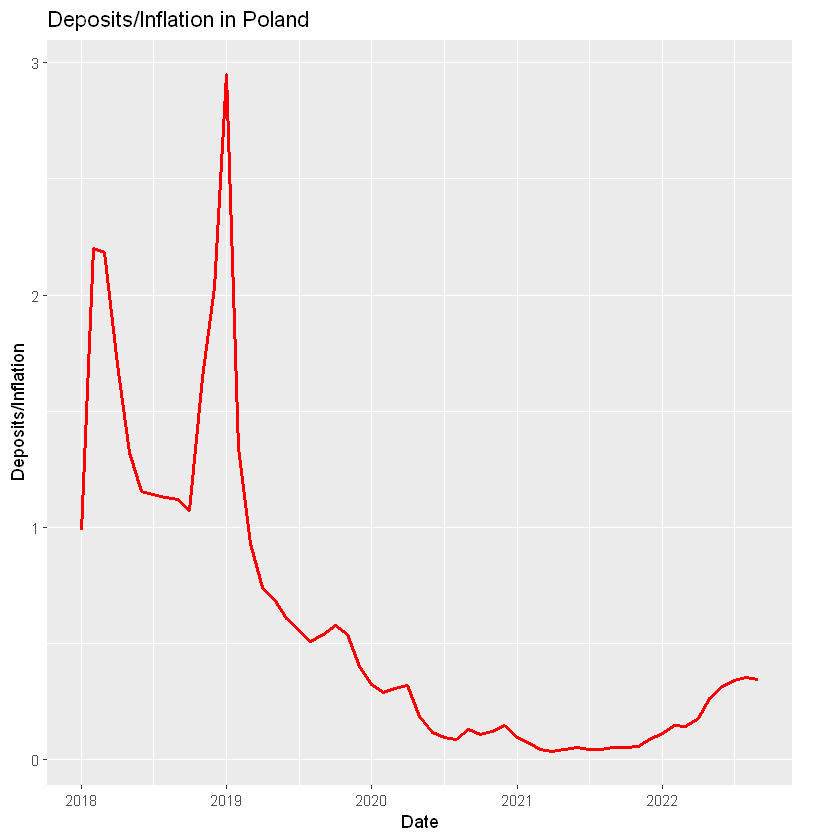

In [373]:
ggplot(data = deposits_to_inflation) +
  geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
  theme(plot.margin = margin(.2,1,0.2,0.2, "cm")) + 
  labs(x = "Date",
       y = "Deposits/Inflation",
       title = "Deposits/Inflation in Poland")

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


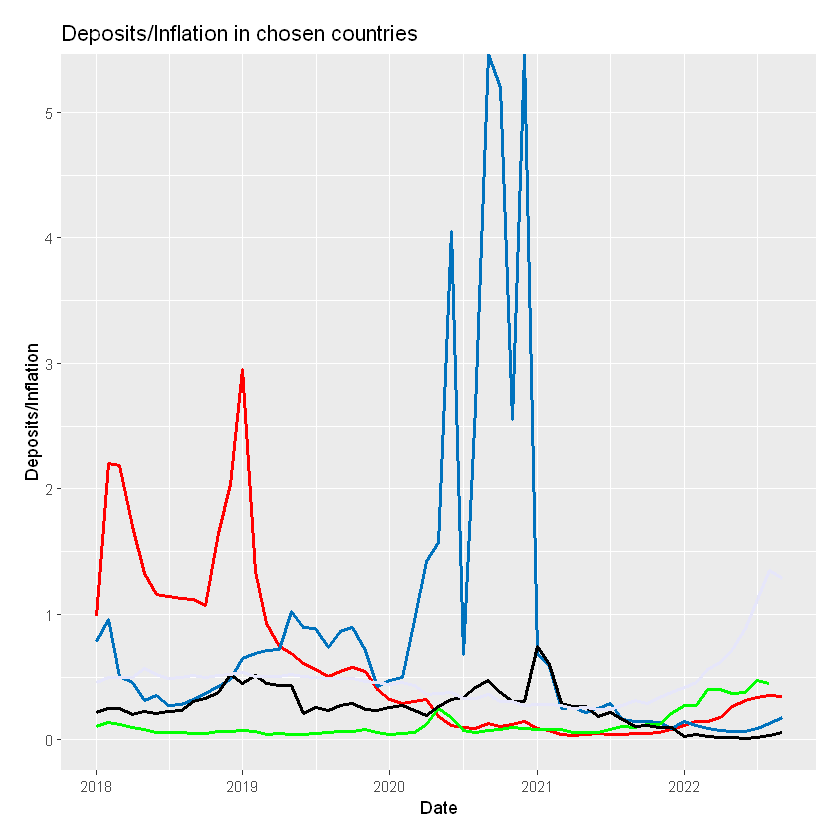

In [421]:
ggplot(data = deposits_to_inflation) +
    geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
    geom_line(aes(x = Period, y = France), color="#0072BD", size=1) +
    geom_line(aes(x = Period, y = Hungary), color="#00FF00", size=1) +
    geom_line(aes(x = Period, y = Slovakia), color="#000000", size=1) +
    geom_line(aes(x = Period, y = average), color="#E6E6FA", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    labs(x = "Date",
        y = "Deposits/Inflation",
        title = "Deposits/Inflation in chosen countries")

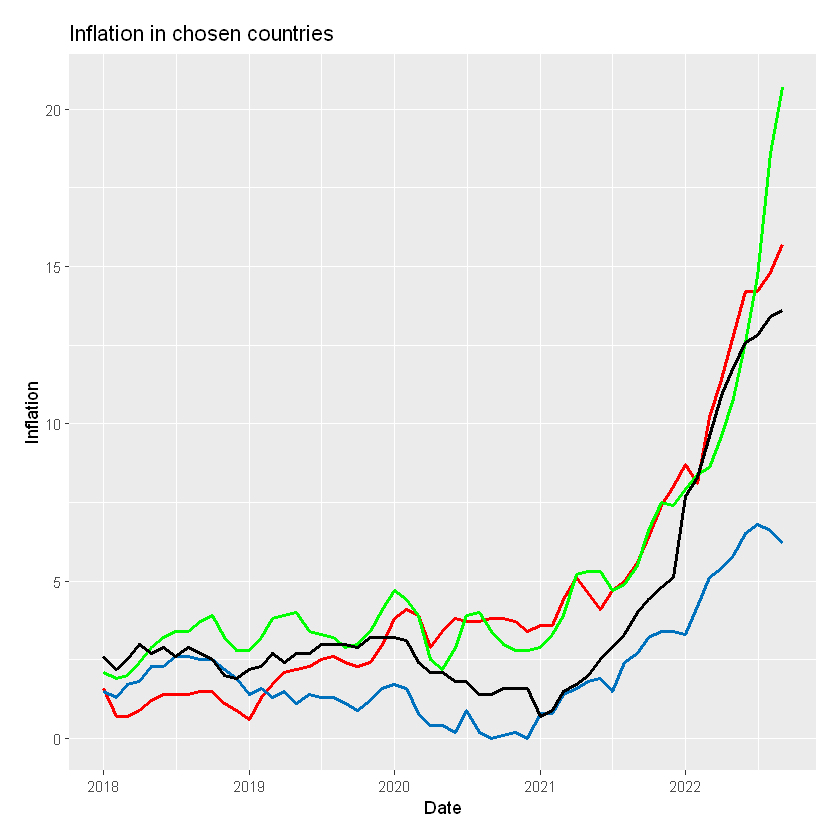

In [366]:
ggplot(data = inflation_from2018) +
    geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
    geom_line(aes(x = Period, y = France), color="#0072BD", size=1) +
    geom_line(aes(x = Period, y = Hungary), color="#00FF00", size=1) +
    geom_line(aes(x = Period, y = Slovakia), color="#000000", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    labs(x = "Date",
        y = "Inflation", 
        title = "Inflation in chosen countries")

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


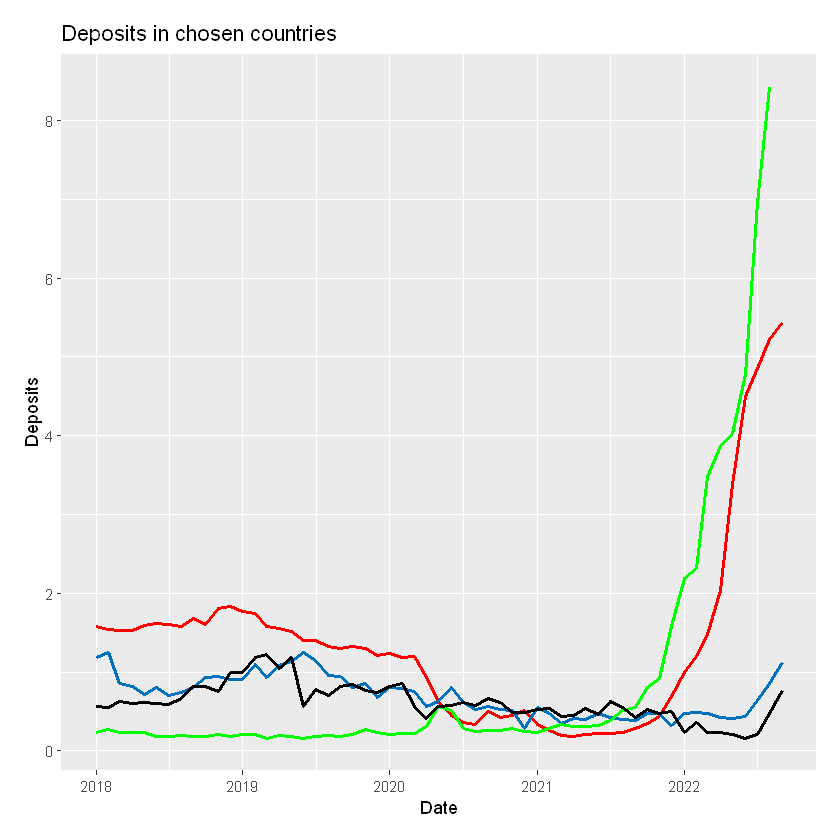

In [372]:
ggplot(data = deposits_from2018) +
    geom_line(aes(x = Period, y = Poland..Polish.zloty), colour="#FF0000", size=1) +
    geom_line(aes(x = Period, y = France..Euro), color="#0072BD", size=1) +
    geom_line(aes(x = Period, y = Hungary..Hungarian.forint), color="#00FF00", size=1) +
    geom_line(aes(x = Period, y = Slovakia..Euro), color="#000000", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    labs(x = "Date",
        y = "Deposits", 
        title = "Deposits in chosen countries")

In [374]:
rowMeans(deposits_from2018[2:28], na.rm=TRUE)

1         2         3         4         5         6         7         8 
1.2850000 1.3492593 1.1159259 0.8903704 0.7237037 0.6200000 0.5618519 0.4574074 
        9        10        11        12        13        14        15        16 
0.4155556 0.3807407 0.3370370 0.2881481 0.3159259 0.2733333 0.2396296 0.2388889 
       17        18        19        20        21        22        23        24 
0.2570370 0.2492593 0.2707407 0.2855556 0.2829630 0.2781481 0.3044444 0.3062963 
       25        26        27        28        29        30        31        32 
0.3592593 0.3281481 0.3318519 0.3792593 0.3696296 0.3592593 0.4311111 0.4559259 
       33        34        35        36        37        38        39        40 
0.4455556 0.4540741 0.4674074 0.4873077 0.4903704 0.4896154 0.4974074 0.5033333 
       41        42        43        44        45        46        47        48 
0.5200000 0.5062963 0.5034615 0.5081481 0.5373077 0.5177778 0.5162963 0.4959259 
       49        50        51        52        53        54        55        56 
0.5161538 0.4980769 0.4914815 0.5251852 0.5718519 0.4988889 0.4974074 0.4962963 
       57 
0.4592593